# Analysis of stock prices in different time periods

**NOTE:** `base date point` will be set separatly for each period.

Example: if we want to get daily prices within a week then each Monday will be set as `base date point`

In [1]:
import sys

sys.path.append('..')

from analysis import Column
from common import plot, YahooRange

from loguru import logger
import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot

FILENAME = "sp500/sp500.csv"
LIMIT = None

logger.remove()
logger.add(sys.stdout, level="INFO")

pass

## Monthly stock price fluctuations within a year

In [2]:
from analysis import get_best_month

df = get_best_month(FILENAME, YahooRange.YEARS_20, limit=LIMIT)
df

,year,month,Symbol,Percent (mean)
0,2001,1,SWKS,100.0
1,2001,2,SWKS,81.063123
2,2001,3,SWKS,39.202658
3,2001,4,SWKS,40.863787
4,2001,5,SWKS,65.887046
...,...,...,...,...
107563,2020,8,CTVA,96.544788
107564,2020,9,CTVA,95.873869
107565,2020,10,CTVA,96.88024
107566,2020,11,CTVA,111.640387


       Percent (mean)
month                
1               100.0
2           239.64699
3          242.718224
4          246.055416
5          249.246913


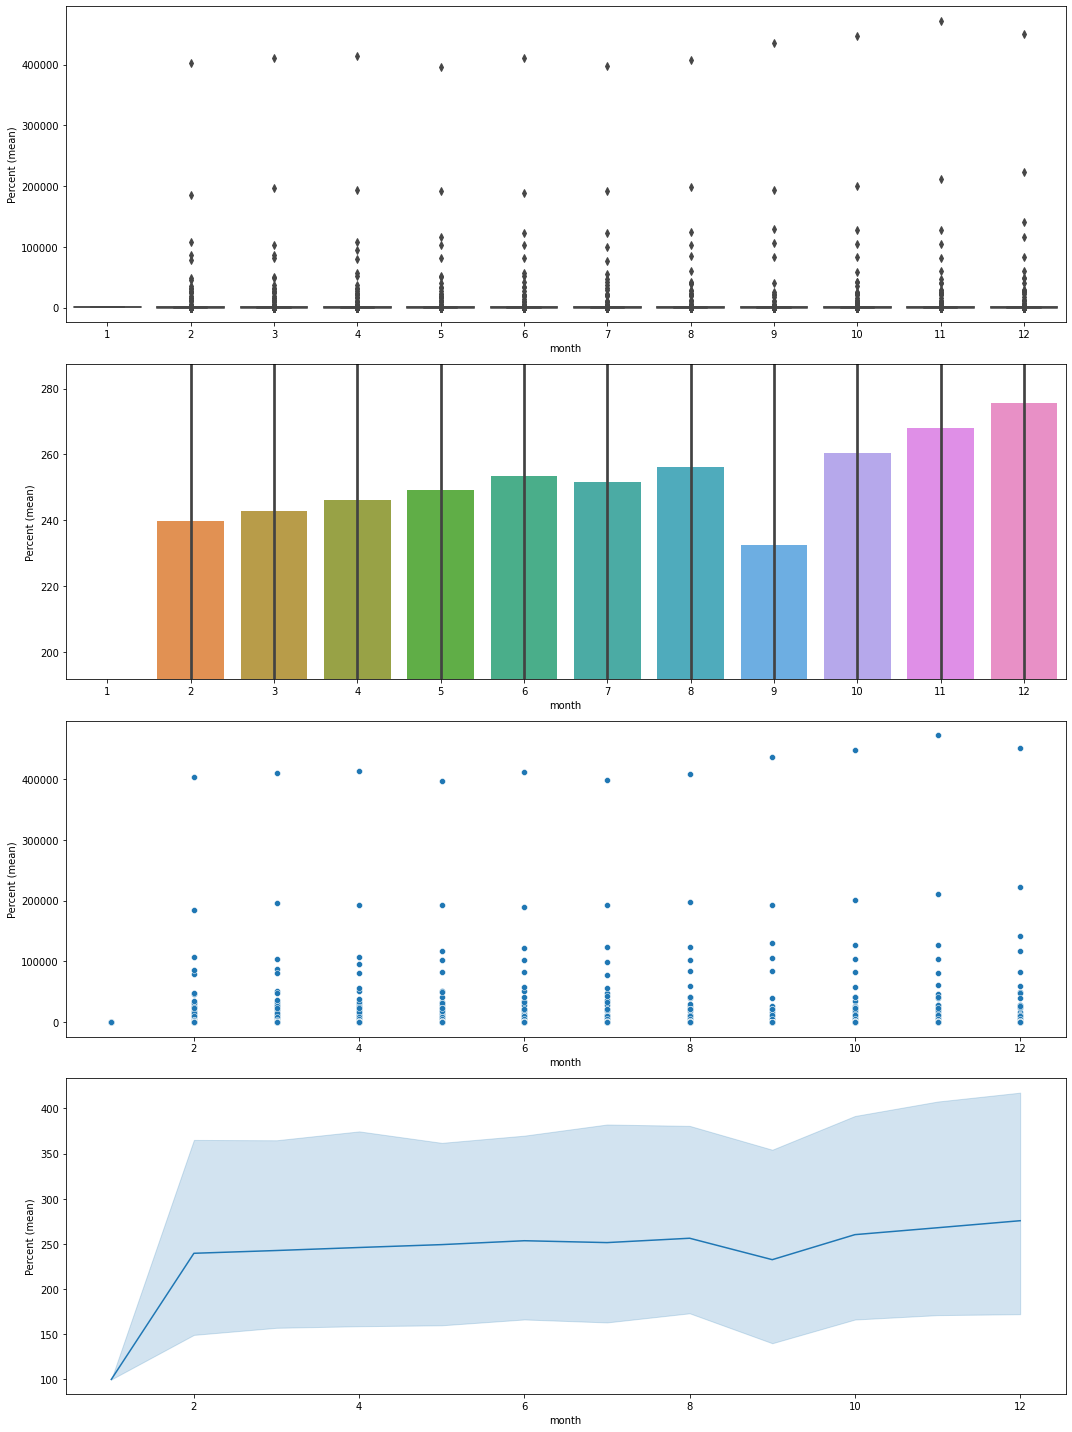

In [3]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df)

## Weekly stock price fluctuations within a year

In [4]:
from analysis import get_best_week

df = get_best_week(FILENAME, YahooRange.YEARS_20, limit=LIMIT)

df

,year,week,Symbol,Percent (mean)
0,2001,1,TXT,100.0
1,2001,2,TXT,101.851852
2,2001,3,TXT,102.910053
3,2001,4,TXT,101.587302
4,2001,5,TXT,102.222221
...,...,...,...,...
466839,2020,49,KSU,123.68814
466840,2020,50,KSU,125.549718
466841,2020,51,KSU,128.241557
466842,2020,52,KSU,126.347536


      Percent (mean)
week                
1         121.795913
2         157.642551
3         108.984987
4         157.598862
5          157.87288


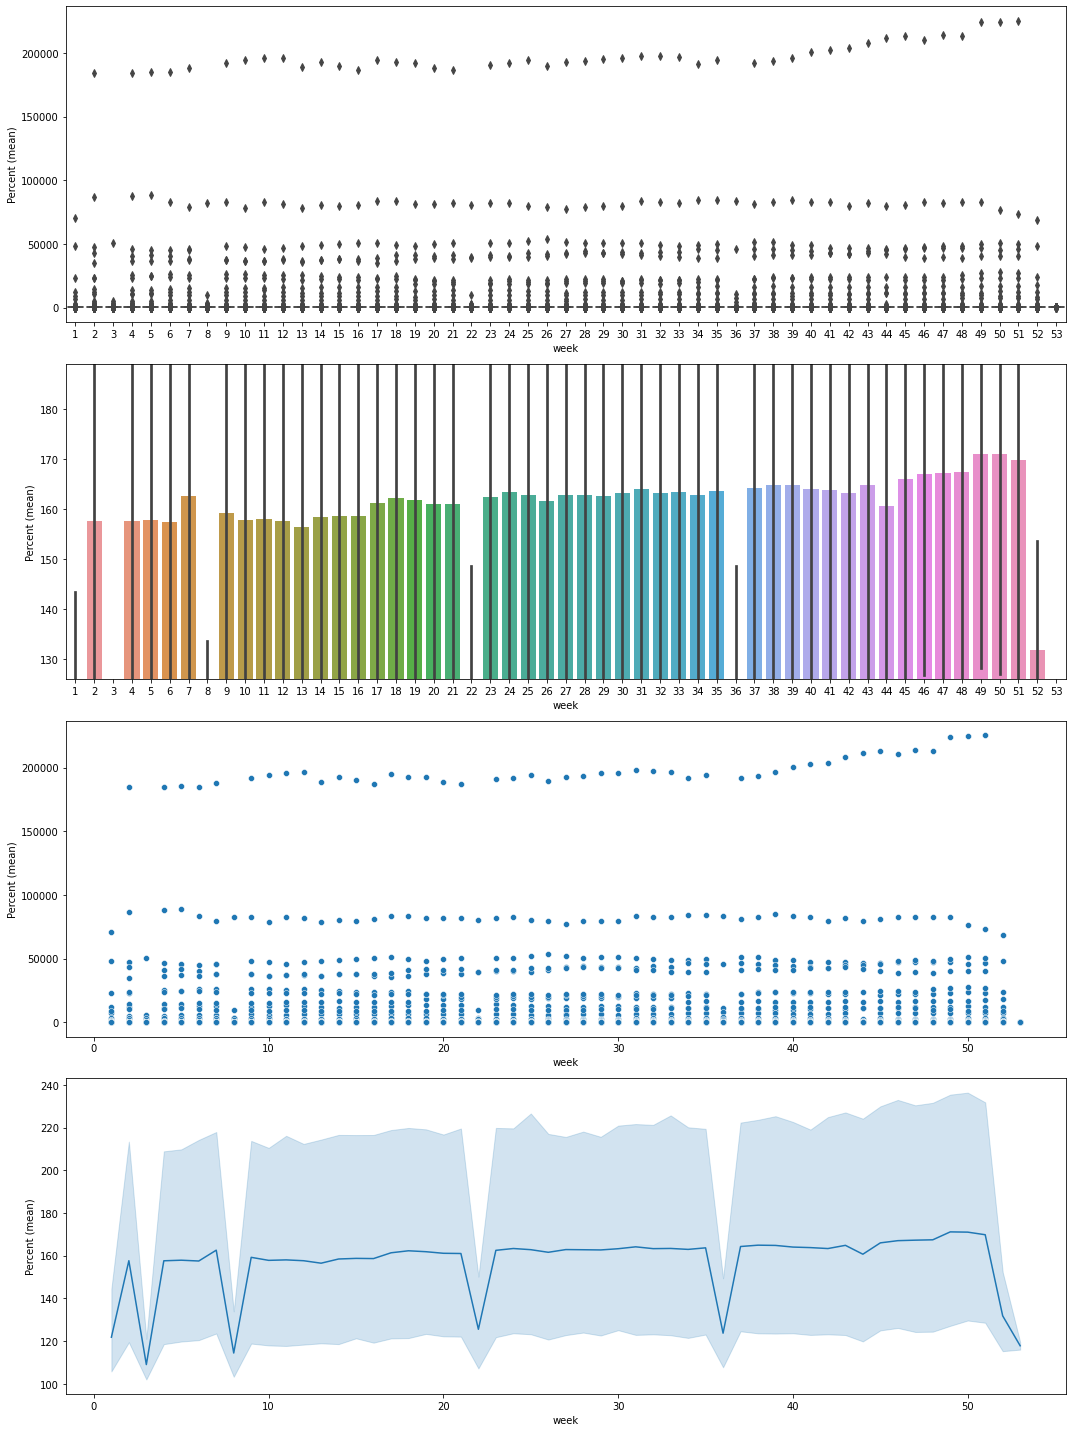

In [5]:
plot(x=Column.WEEK, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a month

In [6]:
from analysis import Column,get_best_month_day

df = get_best_month_day(FILENAME, YahooRange.YEARS_20, limit=LIMIT)

df

,year,month,day,Symbol,Percent (mean)
0,2001,8,1,ZBH,100.0
1,2001,8,2,ZBH,101.655171
2,2001,8,3,ZBH,97.931033
3,2001,8,6,ZBH,96.551724
4,2001,8,7,ZBH,98.275862
...,...,...,...,...,...
2257405,2020,12,24,TSCO,104.380545
2257406,2020,12,28,TSCO,105.026614
2257407,2020,12,29,TSCO,102.222215
2257408,2020,12,30,TSCO,101.817535


     Percent (mean)
day                
1             100.0
2        100.028702
3         100.17617
4        100.092589
5        100.183848


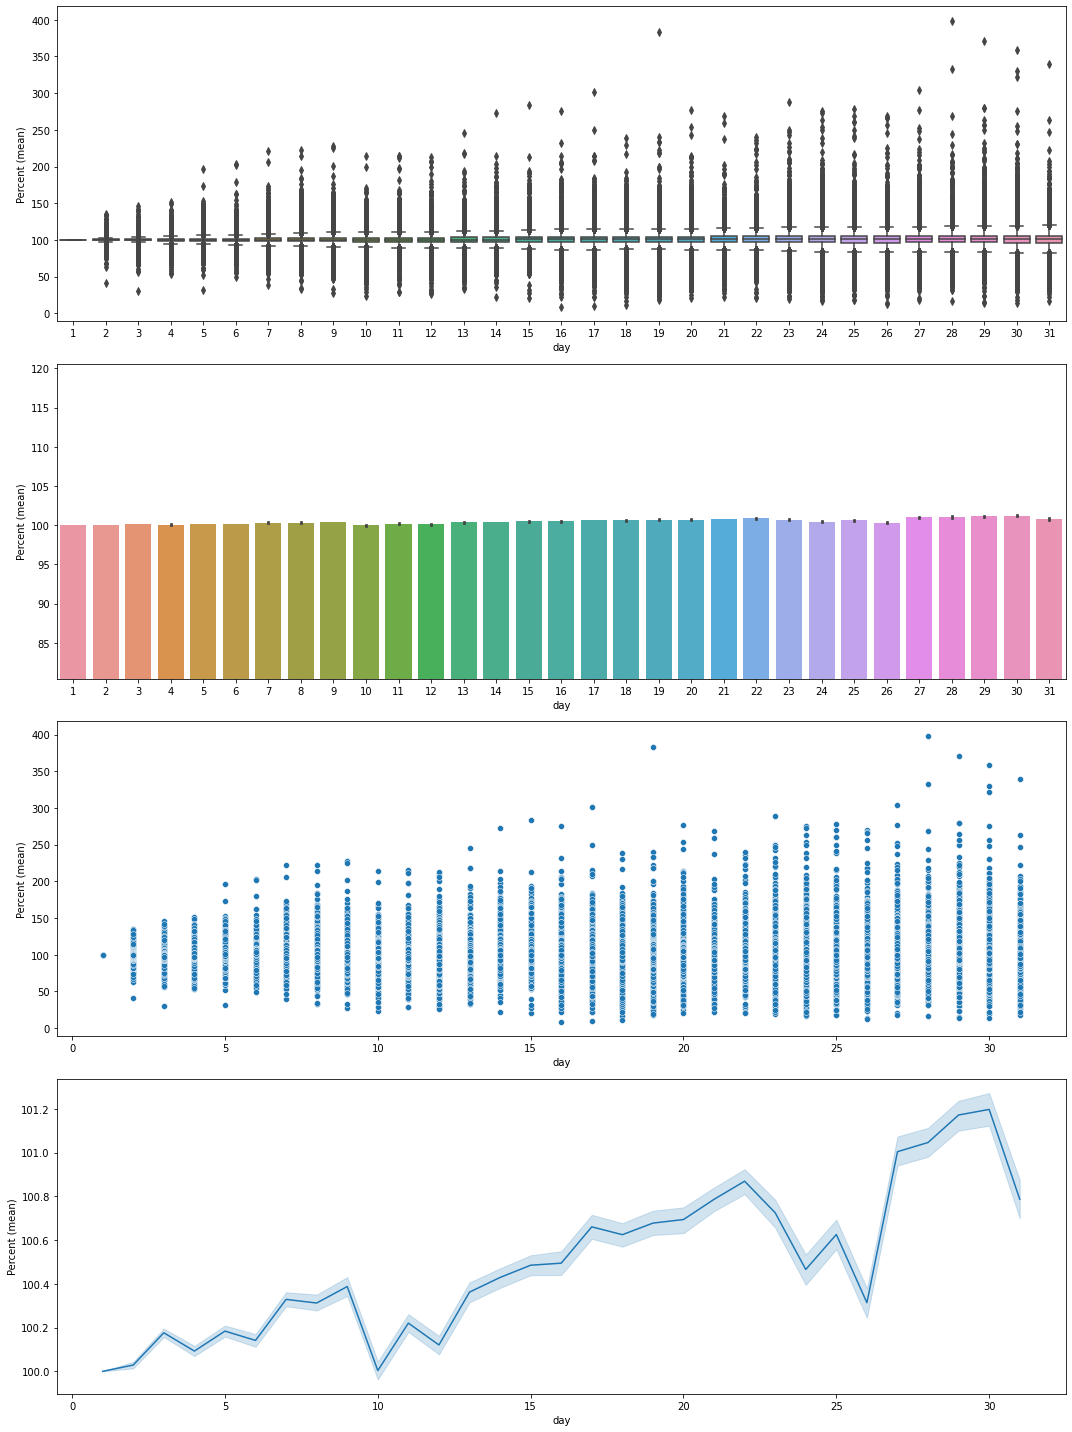

In [7]:
plot(x=Column.DAY, y=Column.PERCENT, data=df)

## Daily stock price fluctuations within a week

In [8]:
from analysis import get_best_weekday


df = get_best_weekday(FILENAME, YahooRange.YEARS_20, limit=LIMIT)

df

,year,week,weekday,Symbol,Percent (mean)
0,2001,30,2,ZBH,100.0
1,2001,30,3,ZBH,97.9661
2,2001,30,4,ZBH,95.593223
3,2001,31,0,ZBH,100.0
4,2001,31,1,ZBH,100.211266
...,...,...,...,...,...
2261315,2020,52,3,TSCO,101.218592
2261316,2020,53,0,TSCO,100.0
2261317,2020,53,1,TSCO,97.32982
2261318,2020,53,2,TSCO,96.944508


         Percent (mean)
weekday                
0                 100.0
1            100.054767
2            100.196967
3            100.198714
4            100.260233


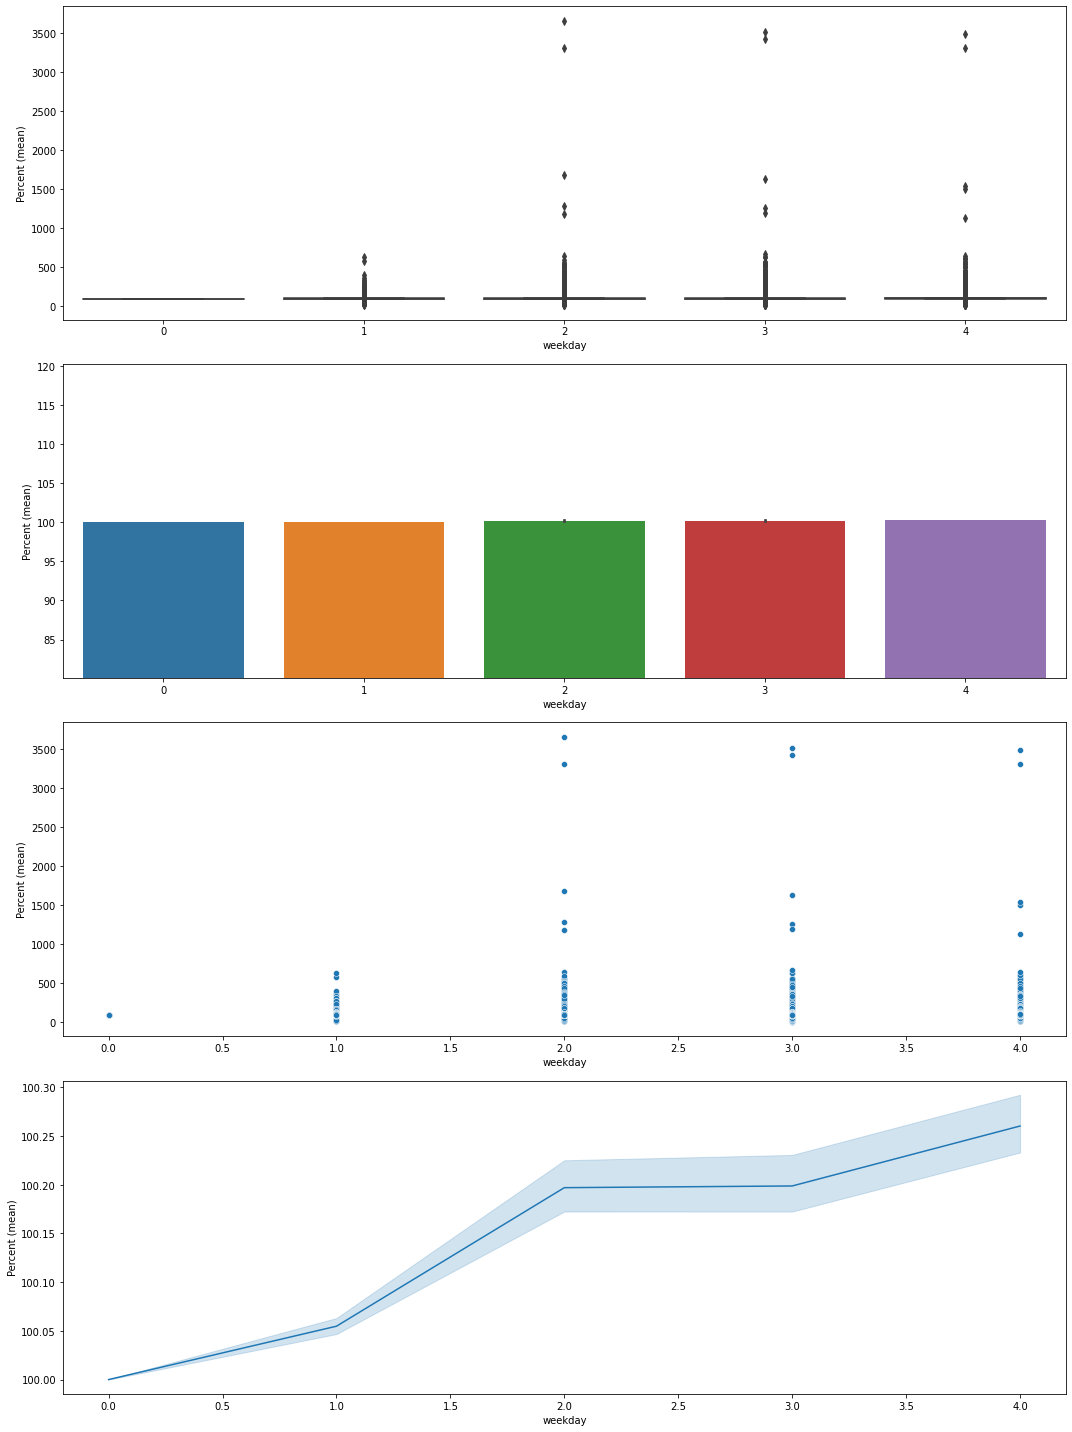

In [9]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df)

## Hourly stock price fluctuations with a day

In [10]:
from analysis import get_best_hour

df = get_best_hour(FILENAME, YahooRange.YEARS_2, limit=LIMIT)

df

,year,week,day,hour,Symbol,Percent (mean)
0,2020,14,3,9,OTIS,100.0
1,2020,14,3,10,OTIS,99.065634
2,2020,14,3,11,OTIS,104.238834
3,2020,14,3,12,OTIS,106.494983
4,2020,14,3,13,OTIS,111.109845
...,...,...,...,...,...,...
5377,2020,53,31,11,CTVA,99.974138
5378,2020,53,31,12,CTVA,100.36213
5379,2020,53,31,13,CTVA,100.336268
5380,2020,53,31,14,CTVA,100.569067


      Percent (mean)
hour                
9              100.0
10        100.282448
11        100.249114
12         100.27905
13        100.288189


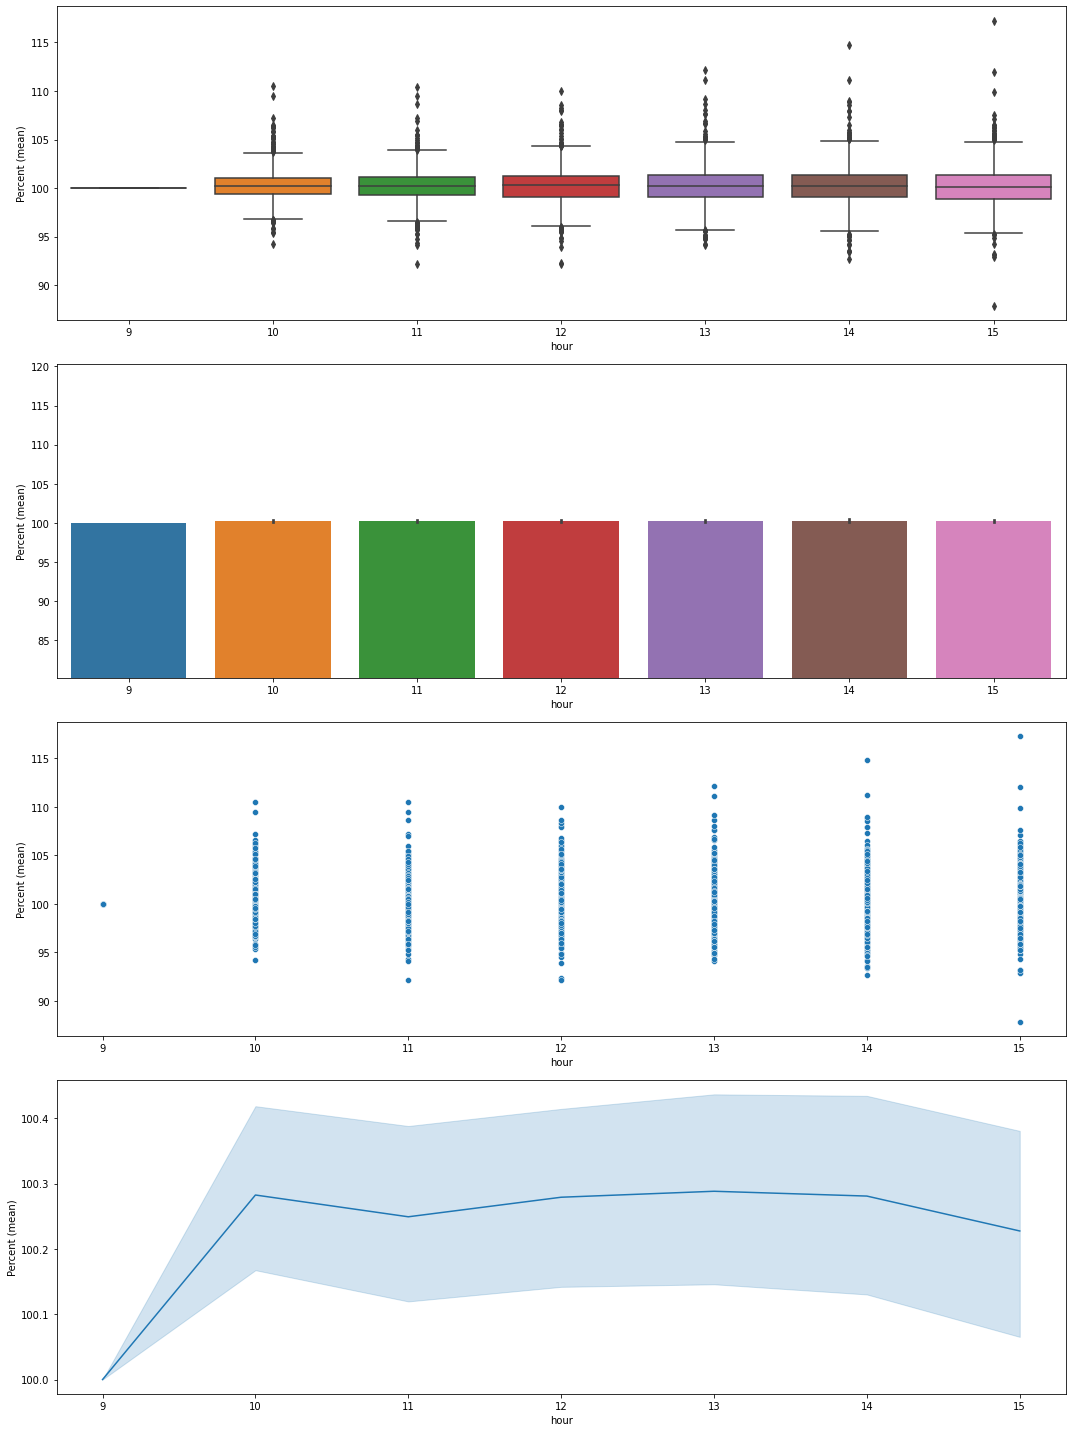

In [11]:
plot(x=Column.HOUR, y=Column.PERCENT, data=df)

## Hourly and quarterly stock price fluctuations within a day

In [12]:
from analysis import get_best_time

df = get_best_time(FILENAME, YahooRange.DAYS_58, limit=LIMIT)

df

,year,week,day,hour,minute,time,Symbol,Percent (mean)
0,2021,11,18,9,30,9.5,TXT,100.0
1,2021,11,18,10,0,10.0,TXT,100.866425
2,2021,11,18,10,30,10.5,TXT,102.518044
3,2021,11,18,11,0,11.0,TXT,102.400718
4,2021,11,18,11,30,11.5,TXT,102.238263
...,...,...,...,...,...,...,...,...
236800,2021,19,11,13,30,13.5,UDR,99.632516
236801,2021,19,11,14,0,14.0,UDR,99.697364
236802,2021,19,11,14,30,14.5,UDR,99.265023
236803,2021,19,11,15,0,15.0,UDR,99.048857


      Percent (mean)
time                
9.5            100.0
10.0      100.009234
10.5      100.002248
11.0       100.00225
11.5      100.049851


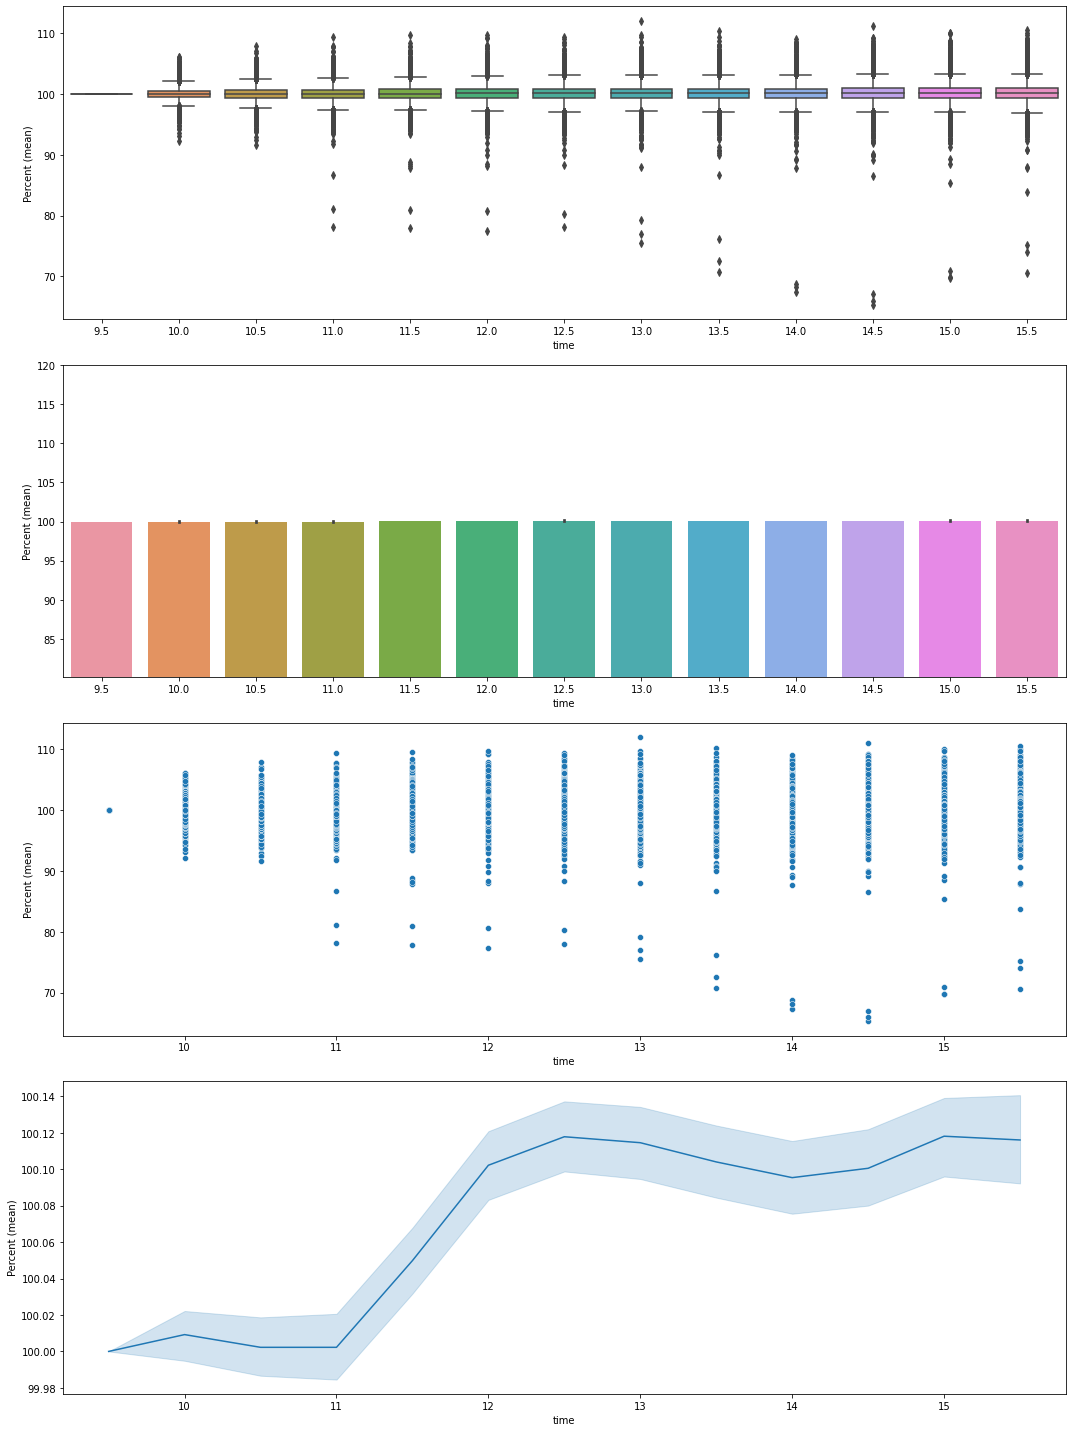

In [13]:
plot(x=Column.TIME, y=Column.PERCENT, data=df)

## Quarterly stock price fluctuations within an hour

In [14]:
from analysis import get_best_quarter

df = get_best_quarter(FILENAME, YahooRange.DAYS_58, limit=LIMIT)

df

,year,week,day,hour,minute,quarter,Symbol,Percent (mean)
0,2021,11,18,9,30,30,AME,100.0
1,2021,11,18,9,45,45,AME,100.621704
2,2021,11,18,10,0,0,AME,100.0
3,2021,11,18,10,15,15,AME,100.061385
4,2021,11,18,10,30,30,AME,99.897688
...,...,...,...,...,...,...,...,...
470959,2021,19,11,14,45,45,LVS,99.752651
470960,2021,19,11,15,0,0,LVS,100.0
470961,2021,19,11,15,15,15,LVS,99.734423
470962,2021,19,11,15,30,30,LVS,99.964588


         Percent (mean)
quarter                
0                 100.0
15            99.996887
30           100.003585
45           100.009275


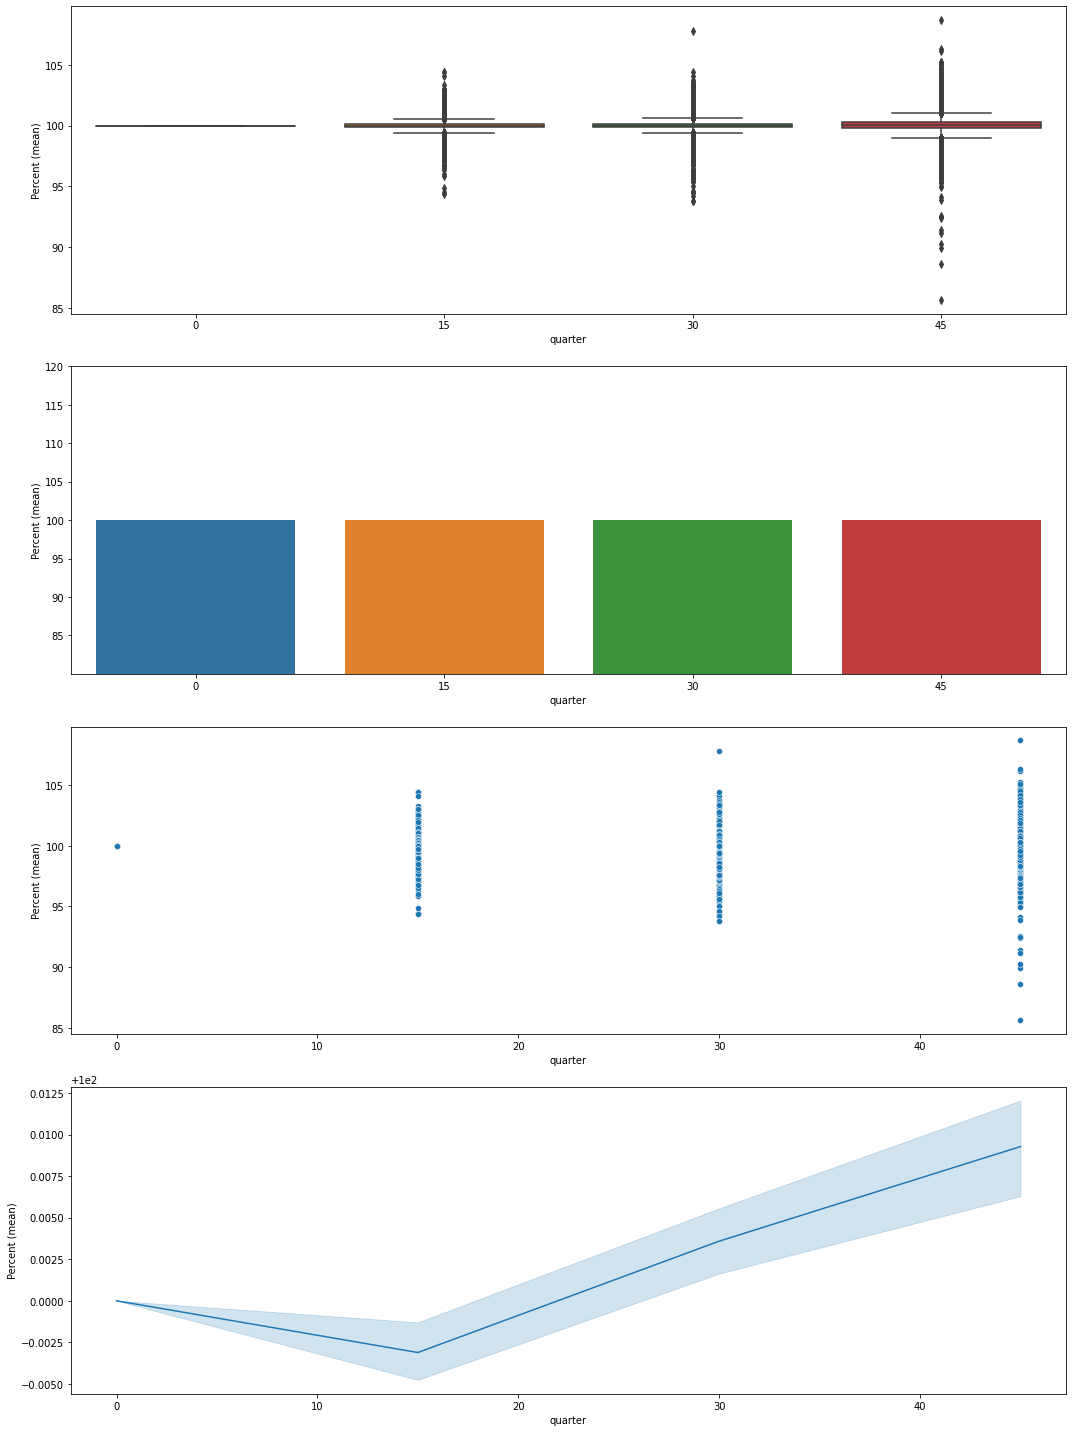

In [15]:
plot(x=Column.QUARTER, y=Column.PERCENT, data=df)